## Part 1 steps 5 - 10  ### (continued)

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\User\Instacart Basket Analysis'
df_orders_products_region = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_10_3_orders_products_region_add.pkl'))

In [2]:
df_orders_products_region.columns

Index(['user_id', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       'product_name', 'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'days_since_prior_order_Flag', 'loyalty_flag', 'spender_flag',
       'median_freq', 'freq_Flag', 'region', 'order_cost'],
      dtype='object')

### I will create a new column 'order_cost' containing full order cost

In [3]:
# Grouping, transform, and new column
df_orders_products_region['order_sum'] = df_orders_products_region.groupby(['order_id'])['order_cost'].transform(np.sum)

In [12]:
df_orders_products_region.head()

,user_id,STATE,Age,n_dependants,fam_status,income,product_name,department_id,prices,order_id,...,order_hour_of_day,days_since_prior_order,days_since_prior_order_Flag,loyalty_flag,spender_flag,median_freq,freq_Flag,region,order_cost,order_sum
0,26711,Missouri,48,3,married,165665,Soda,7,9.0,2543867,...,9,30.0,False,New customer,Low spender,19.0,Regular customer,Midwest,45.0,86.5
1,26711,Missouri,48,3,married,165665,Soda,7,9.0,1285508,...,15,11.0,False,New customer,Low spender,19.0,Regular customer,Midwest,63.0,181.3
2,26711,Missouri,48,3,married,165665,Soda,7,9.0,2578584,...,15,10.0,False,New customer,Low spender,19.0,Regular customer,Midwest,72.0,207.2
3,26711,Missouri,48,3,married,165665,Clementines,4,4.3,518967,...,9,NaN,True,New customer,Low spender,19.0,Regular customer,Midwest,4.3,4.3
4,26711,Missouri,48,3,married,165665,Clementines,4,4.3,2524893,...,11,30.0,False,New customer,Low spender,19.0,Regular customer,Midwest,12.9,72.0


In [5]:
# Export file
df_orders_products_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4_10_4_orders_products_region.pkl'))

In [6]:
# Statistics for 'order_sum'
df_orders_products_region['order_sum'].describe() 

count    3.240198e+07
mean     2.081252e+03
std      2.765565e+03
min      0.000000e+00
25%      4.080000e+02
50%      1.084600e+03
75%      2.630400e+03
max      5.294160e+04
Name: order_sum, dtype: float64

### create order_sum_flag

In [13]:
df_orders_products_region.loc[df_orders_products_region['order_sum'] < 200, 'order_sum_flag'] = 'very small order'

In [15]:
df_orders_products_region.loc[(df_orders_products_region['order_sum'] >= 200) & (df_orders_products_region['order_sum'] < 400), 'order_sum_flag'] = 'small order'

In [19]:
df_orders_products_region.loc[(df_orders_products_region['order_sum'] >= 400) & (df_orders_products_region['order_sum'] < 2000), 'order_sum_flag'] = 'medium order'

In [20]:
df_orders_products_region.loc[df_orders_products_region['order_sum'] >= 2000, 'order_sum_flag'] = 'big order'

In [21]:
# order_sum_flag statistics
df_orders_products_region['order_sum_flag'].value_counts(dropna=False)

order_sum_flag
medium order        13949254
big order           10492621
very small order     4049634
small order          3910466
Name: count, dtype: int64

In [23]:
# Export file
df_orders_products_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4_10_4_order_flag_products_region.pkl'))

### Order sizes in different U.S. regions

In [24]:
a=df_orders_products_region['region']
b=df_orders_products_region['order_sum_flag']
df_cross_flag = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

In [25]:
df_cross_flag

b,big order,medium order,small order,very small order
a,,,,
Midwest,2428773,3288886,925311,953783
Northeast,1864434,2451933,689991,715906
South,3489491,4652110,1300941,1348255
West,2709923,3556325,994223,1031690


#### Create bar chart

<function matplotlib.pyplot.show(close=None, block=None)>

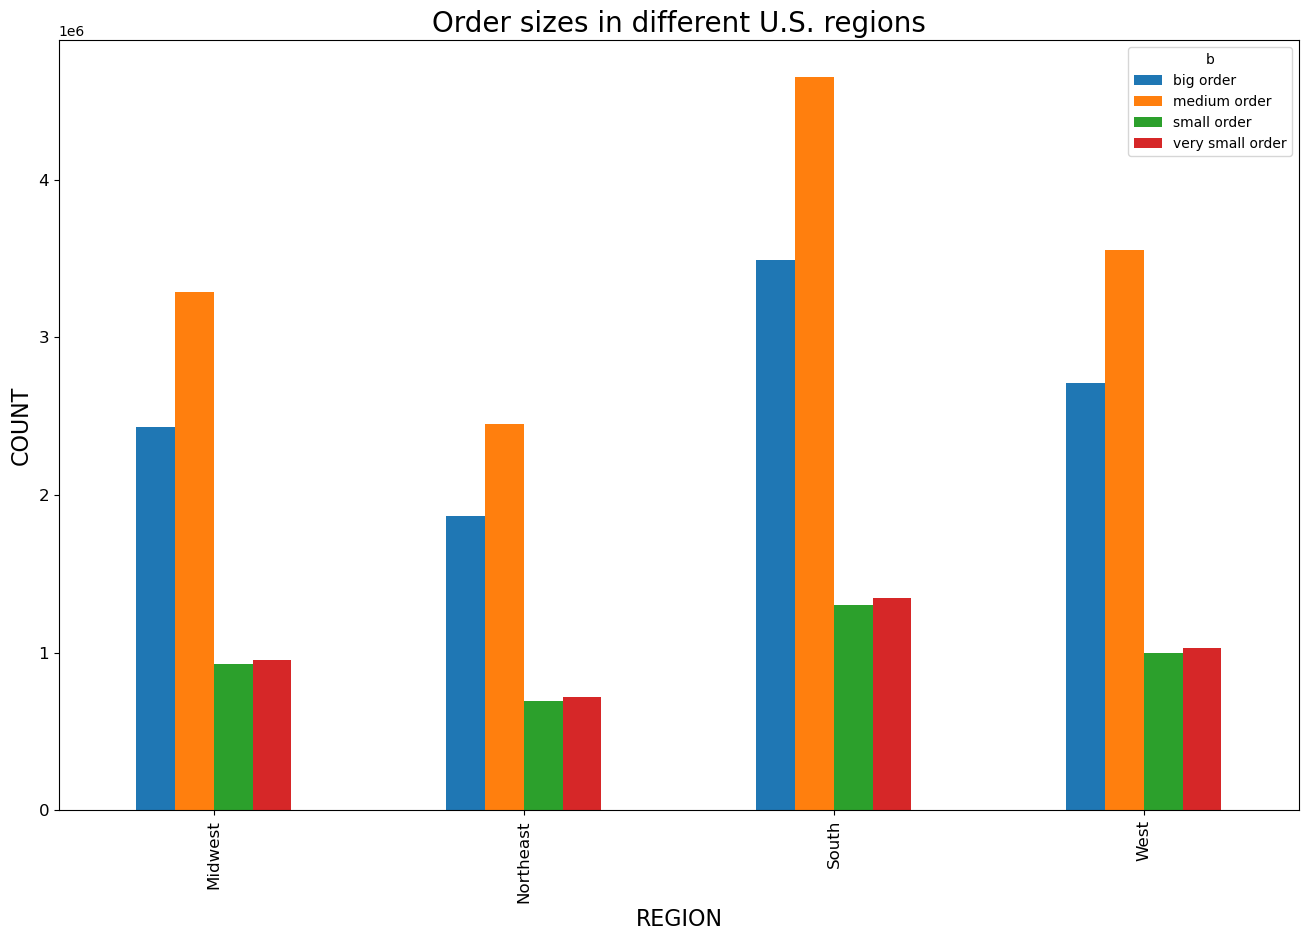

In [36]:
ax = df_cross_flag[['big order','medium order', 'small order', 'very small order']].plot(kind='bar', figsize=(16, 10), legend=True, fontsize=12)
ax.set_xlabel("REGION", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
plt.title("Order sizes in different U.S. regions", fontsize = 20)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_regions.png')) 
plt.show

### We see that in all regions the proprtion big order/medium order/small order/very small order is approximately constant. However, the South region has the biggest count of orders.

## Order sizes in hour of the day

In [39]:
a=df_orders_products_region['orders_day_of_the_week']
b=df_orders_products_region['order_sum_flag']
df_cross_flag = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

In [40]:
df_cross_flag

b,big order,medium order,small order,very small order
a,,,,
0,2026582,2696361,747311,733506
1,1854552,2430130,681393,693618
2,1303672,1833756,519957,556057
3,1195749,1656582,474602,513193
4,1219030,1618603,457842,487969
5,1416317,1781599,492319,515149
6,1476719,1932223,537042,550142


<function matplotlib.pyplot.show(close=None, block=None)>

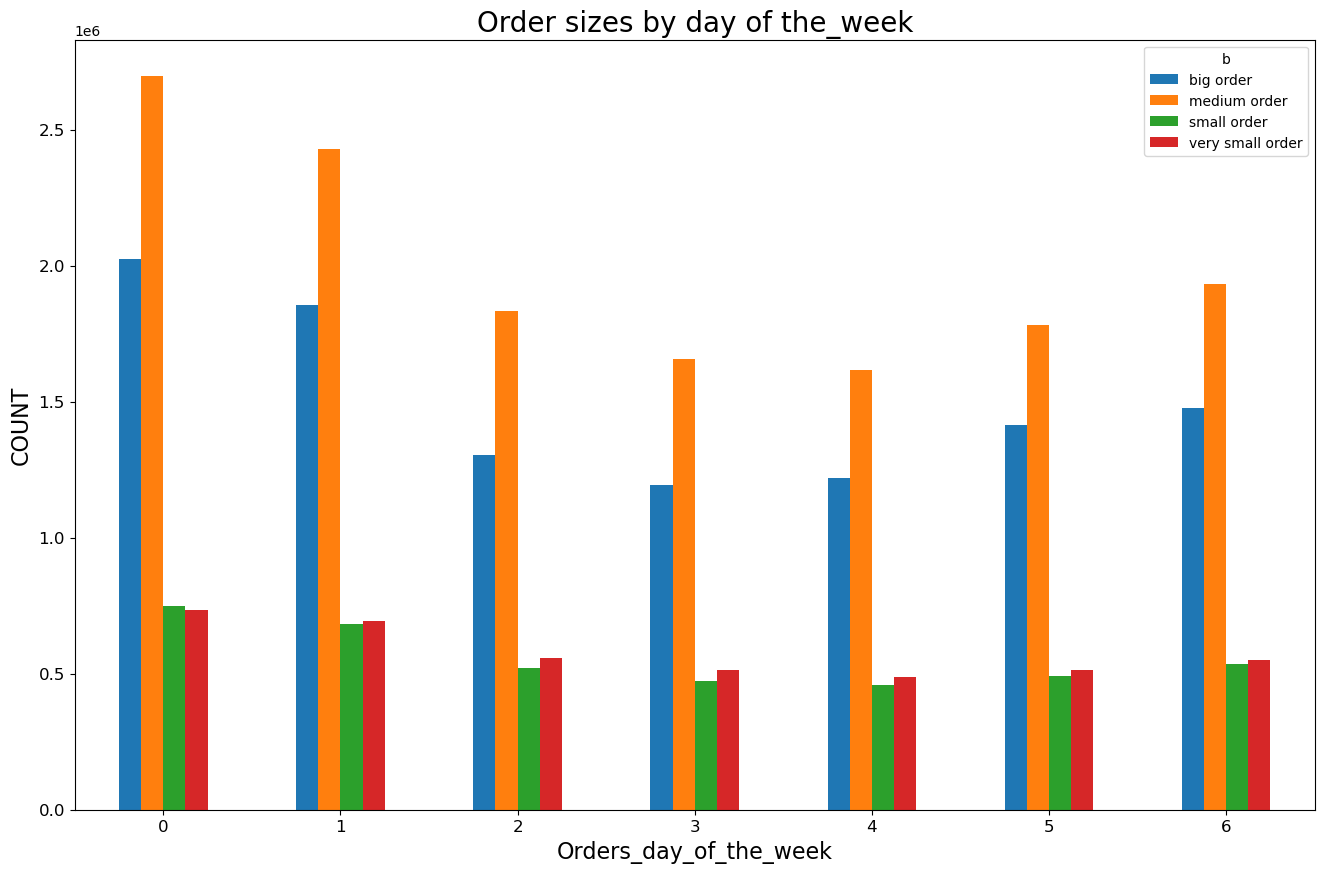

In [43]:
ax = df_cross_flag[['big order','medium order', 'small order', 'very small order']].plot(kind='bar', figsize=(16, 10), legend=True, fontsize=12)
ax.set_xlabel("Orders_day_of_the_week", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
plt.title("Order sizes by day of the_week", fontsize = 20)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_week.png')) 
plt.show

## Order sizes with order frequency (### frequency here means time between orders)

In [46]:
a=df_orders_products_region['freq_Flag']
b=df_orders_products_region['order_sum_flag']
df_cross_flag = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

In [47]:
df_cross_flag

b,big order,medium order,small order,very small order
a,,,,
Frequent customer,9226972,8652459,1887819,1792100
Non-frequent customer,130860,1573185,859747,1070959
Regular customer,1134789,3723610,1162900,1186570


<function matplotlib.pyplot.show(close=None, block=None)>

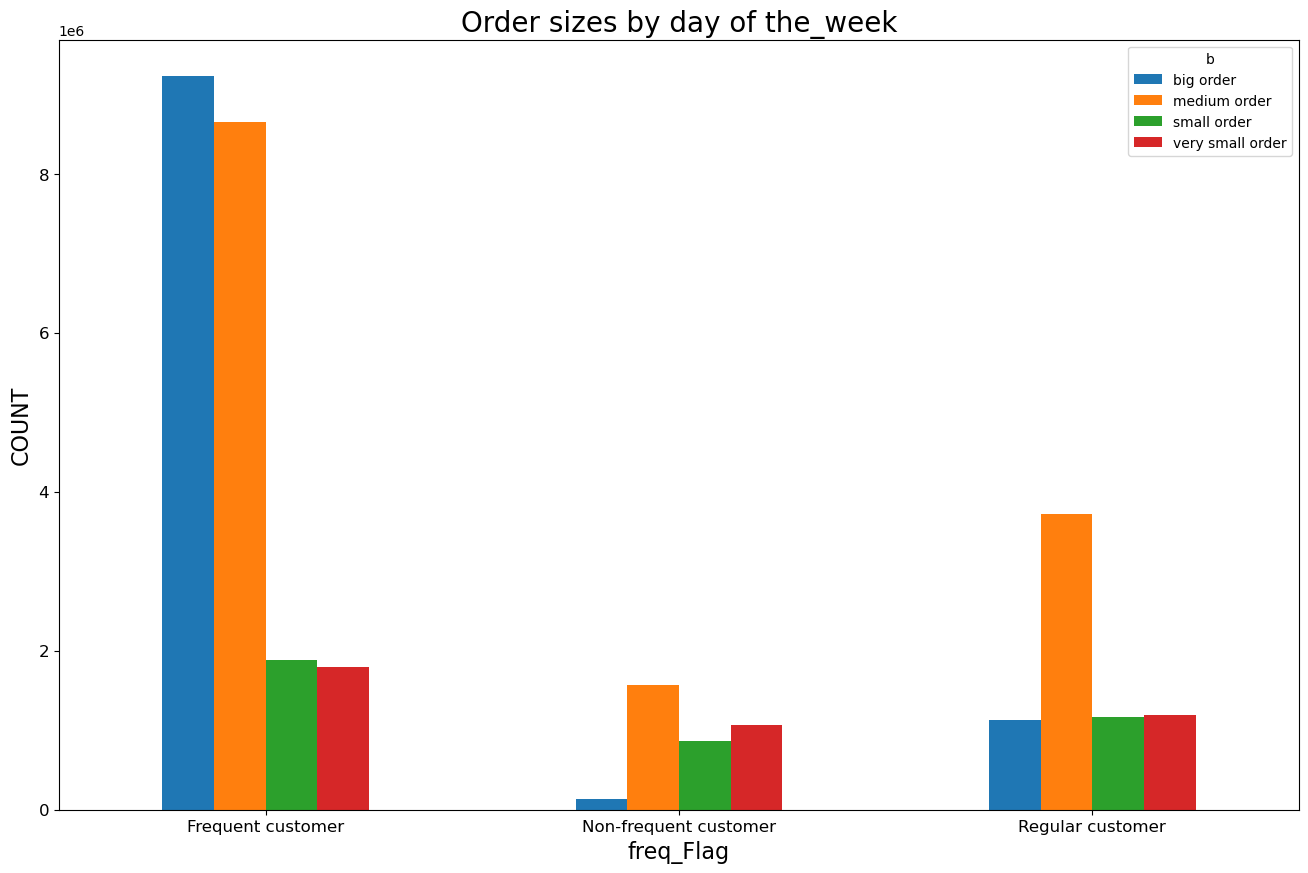

In [48]:
ax = df_cross_flag[['big order','medium order', 'small order', 'very small order']].plot(kind='bar', figsize=(16, 10), legend=True, fontsize=12)
ax.set_xlabel("freq_Flag", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
plt.title("Order sizes by day of the_week", fontsize = 20)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_freq.png')) 
plt.show

In [57]:
a=df_orders_products_region['order_sum_flag']
b=df_orders_products_region['freq_Flag']
df_cross_flag = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

<function matplotlib.pyplot.show(close=None, block=None)>

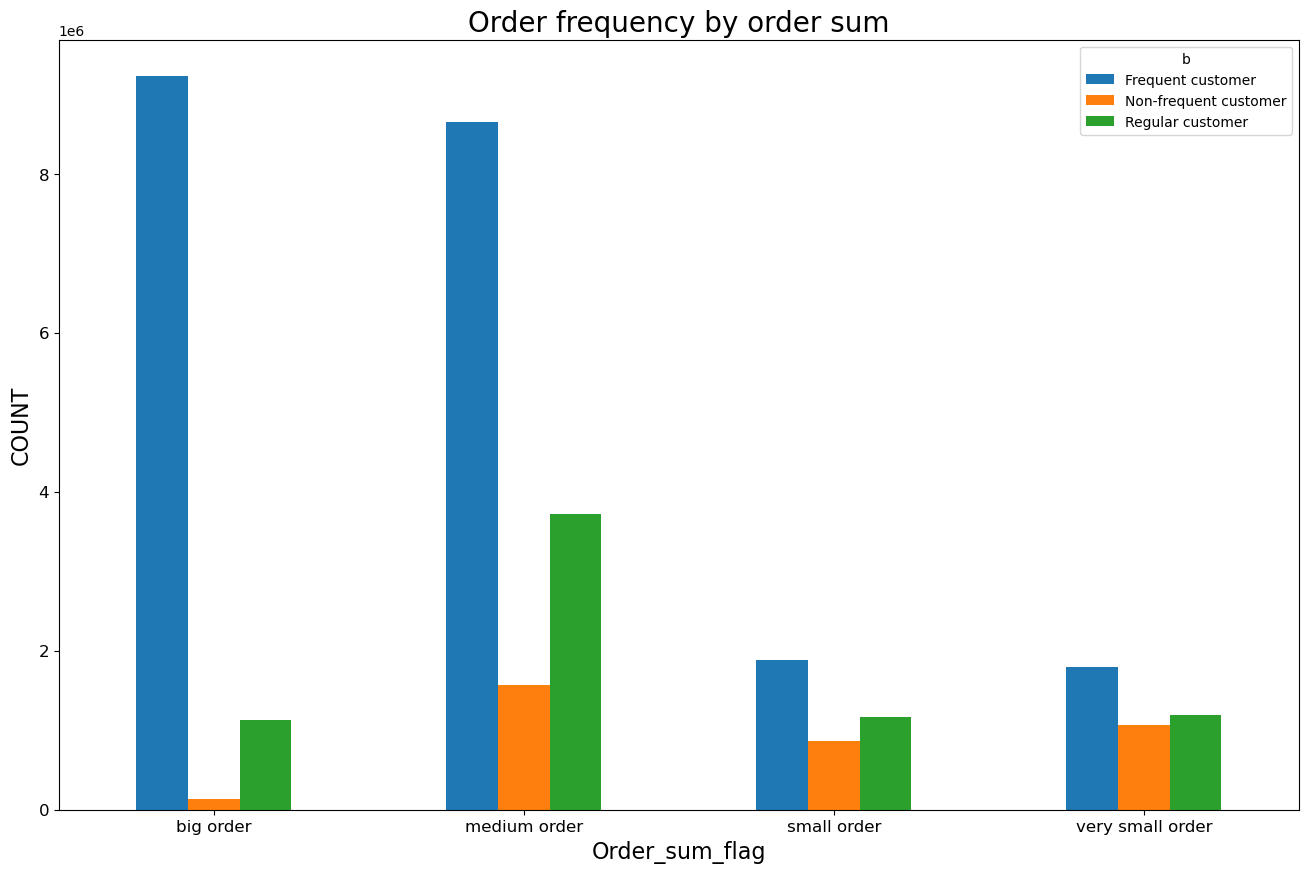

In [58]:
ax = df_cross_flag[['Frequent customer','Non-frequent customer', 'Regular customer']].plot(kind='bar', figsize=(16, 10), legend=True, fontsize=12)
ax.set_xlabel("Order_sum_flag", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
plt.title("Order frequency by order sum", fontsize = 20)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freq_orders.png')) 
plt.show

## I want to know is there a relationship between number of dependants and order sizes

In [55]:
# n_dependants statistics
df_orders_products_region['n_dependants'].value_counts(dropna=False)

n_dependants
3    8134436
0    8096749
2    8090369
1    8080421
Name: count, dtype: int64

In [62]:
a=df_orders_products_region['n_dependants']
b=df_orders_products_region['order_sum_flag']
df_cross_flag = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

In [63]:
df_cross_flag

b,big order,medium order,small order,very small order
a,,,,
0,2628746,3478684,974499,1014820
1,2616700,3474301,976387,1013033
2,2605210,3496637,976775,1011747
3,2641965,3499632,982805,1010034


<function matplotlib.pyplot.show(close=None, block=None)>

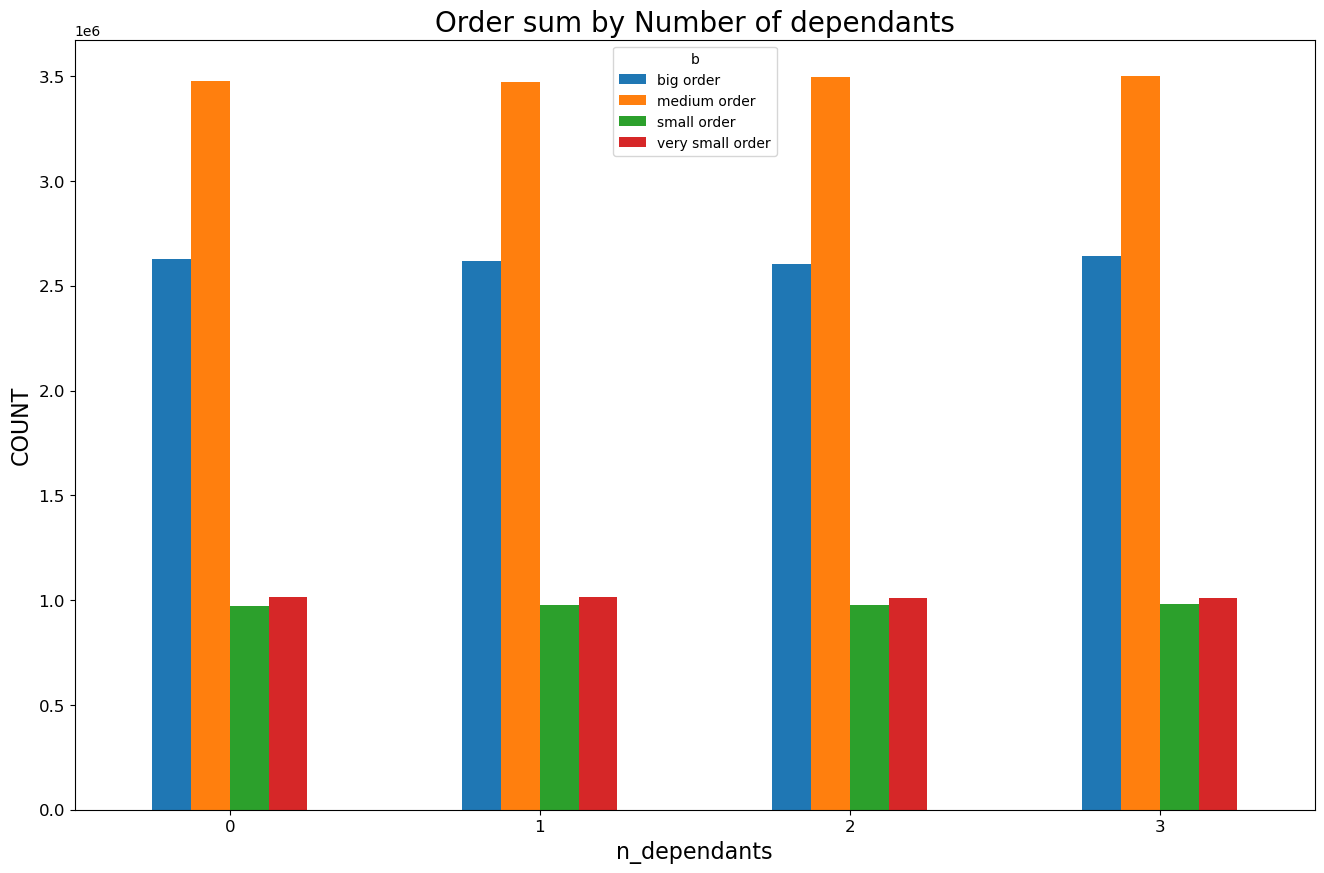

In [64]:
ax = df_cross_flag[['big order','medium order', 'small order', 'very small order']].plot(kind='bar', figsize=(16, 10), legend=True, fontsize=12)
ax.set_xlabel("n_dependants", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
plt.title("Order sum by Number of dependants", fontsize = 20)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depend_orders.png')) 
plt.show

## I don't see any relationship

## I want to know is there a relationship between family status and order sizes

In [65]:
# fam_status statistics
df_orders_products_region['fam_status'].value_counts(dropna=False)

fam_status
married                             22754753
single                               5325187
divorced/widowed                     2771562
living with parents and siblings     1550473
Name: count, dtype: int64

In [66]:
a=df_orders_products_region['fam_status']
b=df_orders_products_region['order_sum_flag']
df_cross_flag = pd.crosstab(a, b, rownames=["a"], colnames=["b"])

In [67]:
df_cross_flag

b,big order,medium order,small order,very small order
a,,,,
divorced/widowed,900828,1194518,330387,345829
living with parents and siblings,511566,663098,184936,190873
married,7352309,9807472,2751031,2843941
single,1727918,2284166,644112,668991


<function matplotlib.pyplot.show(close=None, block=None)>

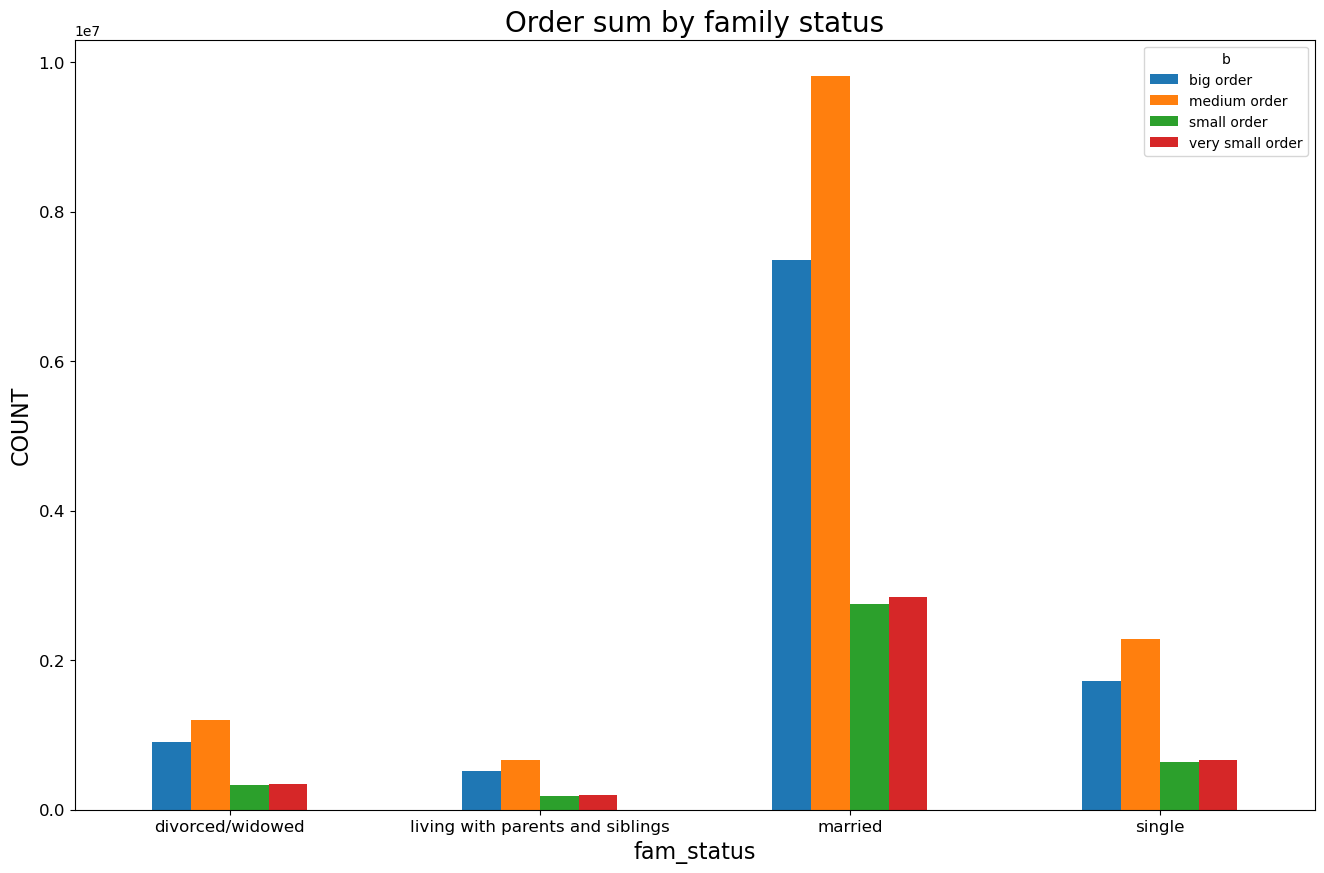

In [68]:
ax = df_cross_flag[['big order','medium order', 'small order', 'very small order']].plot(kind='bar', figsize=(16, 10), legend=True, fontsize=12)
ax.set_xlabel("fam_status", fontsize=16)
ax.set_ylabel("COUNT", fontsize=16)
plt.title("Order sum by family status", fontsize = 20)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_orders.png')) 
plt.show

## Married customers give the most of revenue. 